In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from google.colab import drive
drive.mount('/content/drive')

def rk4(y, t, dt, derivs): # rk4 method y_i -> y_i+1
    k1 = dt * derivs(y, t)
    k2 = dt * derivs(y + k1 / 2., t + dt / 2.)
    k3 = dt * derivs(y + k2 / 2., t + dt / 2.)
    k4 = dt * derivs(y + k3, t + dt)
    y_next = y + (k1 + 2.*k2 + 2.*k3 + k4) / 6.
    return y_next

def pendulum( y, t):
    diff0 = y[1] # dtheta/dt = omega
    diff1 = -(g/L)*np.sin(y[0])
    diff1 -= 2.*beta*y[1]
    diff1 += alpha*np.cos(omega_F*t)
    return np.array([diff0, diff1])

Mounted at /content/drive


In [2]:
N = 2000 # number of steps
tf = 50.0 # time interval [s]
dt = tf/float(N-1) # time step [s]

g = 9.8 # grav. acceleration [m/s^2]
L = 9.8 # pendulum length [m]
beta = 0.0 # 1.0 # damping constant [s^-1]
alpha = 0.0 # alpha = F/mL
omega_F = 0.99 # magnitude of driving force [s^-1]
print("freq. %2.2f s^-1, period %2.2f s" % (np.sqrt(g/L), 2.*np.pi/np.sqrt(g/L)))

theta_o = 0.1 # initial angle [radians]
omega_o = 0.0 # inital angular velocity [rad/s]

freq. 1.00 s^-1, period 6.28 s


Text(0, 0.5, 'ang. velocity [rad/s]')

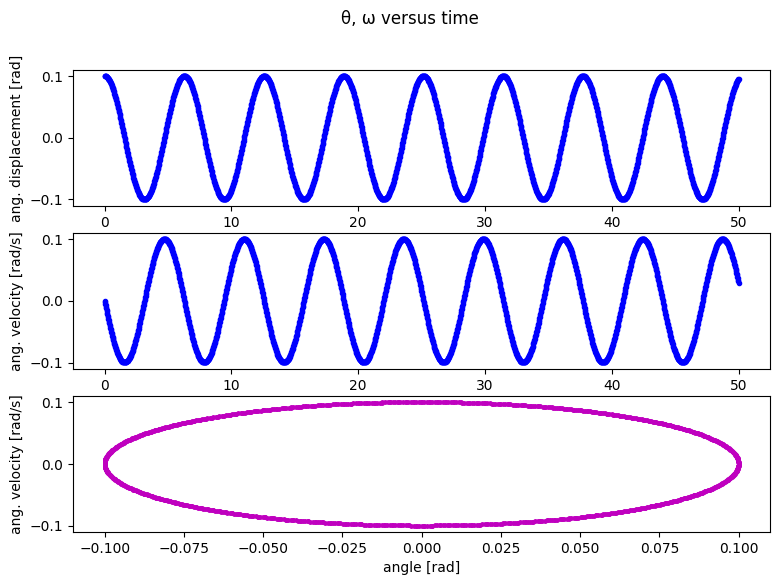

In [3]:
t = np.linspace(0, tf, N) # Nx1 evenly spaced t_i time array
theta = np.zeros([N,2]) # Nx2 array (N rows, 2 columns) for y_i, v_i state
theta[0,0] = theta_o
theta[0,1] = omega_o

for j in range(N-1): # Loop over steps
    theta[j+1] = rk4(theta[j], t[j], dt, pendulum)

theta_n = theta[:,0].copy()
theta_np = (theta[:,0]+np.pi)%(2.*np.pi) - np.pi
omega_n = theta[:,1].copy()

theta_a = theta_o*np.cos(np.sqrt(g/L)*t)
omega_a = -theta_o*np.sqrt(g/L)*np.sin(np.sqrt(g/L)*t)

fig, axes = plt.subplots(3,figsize=(9, 6))
fig.suptitle('θ, ω versus time')

axes[0].plot(t, theta_n, "b.", label='numerical')
axes[0].set_xlabel ('time [s]')
axes[0].set_ylabel ('ang. displacement [rad]')

axes[1].plot(t, omega_n, "b.")
axes[1].set_xlabel ('time [s]')
axes[1].set_ylabel ('ang. velocity [rad/s]')

axes[2].plot(theta_np[1000:], omega_n[1000:], "m.", markersize=5)
#axes[2].plot(theta_np, omega_n, "m.")
axes[2].set_xlabel ('angle [rad]')
axes[2].set_ylabel ('ang. velocity [rad/s]')



In [ ]:
def get_coords(theta):
    return L * np.sin(theta), -L * np.cos(theta)

# animation
fig = plt.figure(figsize =(12,4))
ax1 = fig.add_subplot(1,2,1, aspect='equal')
ax2 = fig.add_subplot(1,2,2)

ax1.set_xlim(-L*1.1, L*1.1)
ax1.set_ylim(-L*1.1, L*1.1)
ax2.set_xlim(1.1*np.amin(theta_n), 1.1*np.amax(theta_n))
ax2.set_ylim(1.1*np.amin(omega_n), 1.1*np.amax(omega_n))

x0, y0 = get_coords(theta_n[0])
line1, = ax1.plot([0, x0], [0, y0], lw=3, c='k')
line2, = ax2.plot(0, 0)
circ2 = ax2.add_patch(plt.Circle(get_coords(theta_n[0]), 0.05, fc='r', zorder=3))

thta = []
omga = []

def animate(i):
    x,y = get_coords(theta_n[i])
    line1.set_data([0, x], [0, y])
    thta.append(theta_n[i])
    omga.append(omega_n[i])
    line2.set_xdata(thta)
    line2.set_ydata(omga)
    return line2,

anim = animation.FuncAnimation(fig, animate, range(1, len(theta_n), 4), interval = 1000*dt)
plt.close()

plt.rcParams["animation.html"] = "jshtml"
anim


In [ ]:
anim.save("/content/drive/MyDrive/Courses/phy508/pendulum thetao0.1 beta0.25 alpha1.5 omegaF0.667.mp4")